In [80]:
#Sources:
# - https://www.youtube.com/watch?v=WNJJuSWfuTY 

# Imports:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.animation as animation

In [81]:
# Constants:
g = 9.81            # m/s^2
L_hammer = 1        # m
dt = 0.001          # s
duration = 2        # s

In [82]:
# Initial conditions:
theta_0 = np.deg2rad(175)
theta_dot_0 = 0

In [83]:
# Define ordinary differential equation
def hammer_ODE(t, y):
    return (y[1], -g * np.sin(y[0]) / L_hammer)

In [84]:
# Solve the ODE
sol = solve_ivp(hammer_ODE, [0, duration], (theta_0, theta_dot_0), t_eval=np.linspace(0,duration, round(duration/dt)))

In [85]:
# Extract outputs
t = sol.t
theta_deg = np.rad2deg(sol.y[0])
theta_dot_deg = np.rad2deg(sol.y[1])

In [86]:
# Print maximum speed:
speeds = abs(np.deg2rad(theta_dot_deg)) * L_hammer     # m/s
max_speed = max(speeds)     # m/s
print(max_speed)

6.260621693794707


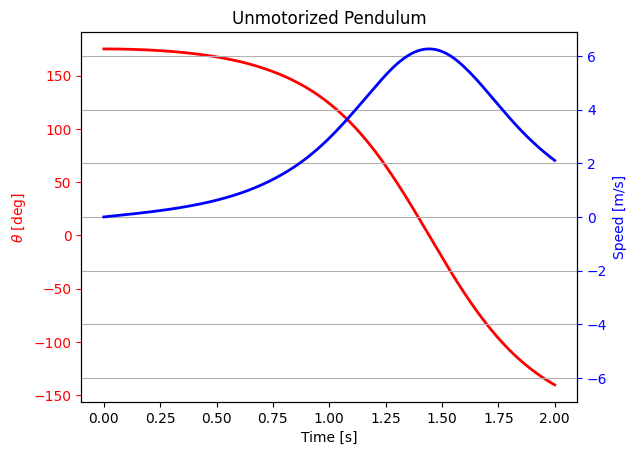

In [87]:
# Plot time vs theta and thetadot 
fig, ax1 = plt.subplots()

ax1.set_ylabel(r'$\theta$ [deg]', color = 'red')
ax1.tick_params(axis='y', color='red',labelcolor='red')
ax1.set_xlabel("Time [s]")
ax1.plot(t, theta_deg, 'r', lw=2, label=r'$\theta$')

ax2 = ax1.twinx()
plt.plot(t, speeds, 'b', lw=2, label=r'$\dot \theta$')
plt.ylabel(r'Speed [m/s]', color='blue')
plt.tick_params(axis='y', color='blue', labelcolor='blue')
plt.ylim(-max_speed*1.1, max_speed*1.1)

plt.title("Unmotorized Pendulum")
plt.grid()
plt.show()

In [94]:
# Define ordinary differential equation
motor_torque = -100               # Nm

def motorized_hammer_ODE(t, y):
    return (y[1], -g * np.sin(y[0]) / L_hammer + motor_torque)

In [95]:
# Solve the ODE
sol_motorized = solve_ivp(motorized_hammer_ODE, [0, duration], (theta_0, theta_dot_0), t_eval=np.linspace(0,duration, round(duration/dt)))
t_mot = sol_motorized.t
theta_deg_mot = np.rad2deg(sol_motorized.y[0])
theta_dot_deg_mot = np.rad2deg(sol_motorized.y[1])

# Print maximum speed:
speeds_mot = abs(np.deg2rad(theta_dot_deg_mot)) * L_hammer     # m/s
max_speed_mot = max(speeds_mot)     # m/s
print(max_speed_mot)

204.7714294702324


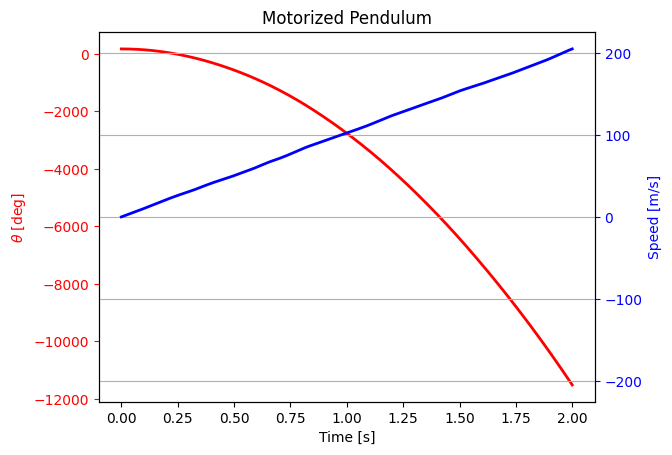

In [96]:
# Plot time vs theta and thetadot 
fig, ax1 = plt.subplots()

ax1.set_ylabel(r'$\theta$ [deg]', color = 'red')
ax1.tick_params(axis='y', color='red',labelcolor='red')
ax1.set_xlabel("Time [s]")
ax1.plot(t, theta_deg_mot, 'r', lw=2, label=r'$\theta$')

ax2 = ax1.twinx()
plt.plot(t_mot, speeds_mot, 'b', lw=2, label=r'$\dot \theta$')
plt.ylabel(r'Speed [m/s]', color='blue')
plt.tick_params(axis='y', color='blue', labelcolor='blue')
plt.ylim(-max_speed_mot*1.1, max_speed_mot*1.1)

plt.title("Motorized Pendulum")
plt.grid()
plt.show()

In [102]:
# Calculate actual max speed
impact_index = 1
while theta_deg_mot[impact_index] > 0:
    impact_index += 1

impact_index = (impact_index - 1) if abs(theta_deg_mot[impact_index-1]) < abs(theta_deg_mot[impact_index]) else impact_index
print(speeds_mot[impact_index])


25.420872430544804
